In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import files
files.upload()

Saving cleaned_Seattle_data.csv to cleaned_Seattle_data.csv


{'cleaned_Seattle_data.csv': b',SecondLargestPropertyUseTypeGFA,SecondLargestPropertyUseType,ENERGYSTARScore,LargestPropertyUseType,LargestPropertyUseTypeGFA,TotalGHGEmissions,SiteEnergyUse,NumberofFloors,NumberofBuildings,CouncilDistrictCode,DefaultData,Latitude,Longitude,Neighborhood,YearBuilt,Outlier,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,BuildingType\n0,0.0,No Use,65.0,Housing,16.432329838906202,7.968263588541785,22.73509093530175,3.700439718141092,1.0,7,False,5.603246231927404,-122.33799744,downtown,1927,normal,Housing,16.432329838906202,0.0,16.432329838906202,NonResidential\n1,13.878913052481826,Other,51.0,Housing,16.356056440393125,8.047178455318921,22.99407646829777,3.584962500721156,1.0,7,False,5.603273403924381,-122.33335756,downtown,1996,normal,Housing,16.433438738832848,13.878913052481826,16.660204858537877,NonResidential\n4,16.053459271349304,Other,67.0,Housing,16.913520564269817,8.990671283975267,23.82192770536634,4.247927513443585,

In [3]:
Seattle_data=pd.read_csv('cleaned_Seattle_data.csv',index_col=0)
Seattle_data.head()

,SecondLargestPropertyUseTypeGFA,SecondLargestPropertyUseType,ENERGYSTARScore,LargestPropertyUseType,LargestPropertyUseTypeGFA,TotalGHGEmissions,SiteEnergyUse,NumberofFloors,NumberofBuildings,CouncilDistrictCode,DefaultData,Latitude,Longitude,Neighborhood,YearBuilt,Outlier,PrimaryPropertyType,PropertyGFABuilding(s),PropertyGFAParking,PropertyGFATotal,BuildingType
0,0.000000,No Use,65.0,Housing,16.432330,7.968264,22.735091,3.700440,1.0,7,False,5.603246,-122.337997,downtown,1927,normal,Housing,16.432330,0.000000,16.432330,NonResidential
1,13.878913,Other,51.0,Housing,16.356056,8.047178,22.994076,3.584963,1.0,7,False,5.603273,-122.333358,downtown,1996,normal,Housing,16.433439,13.878913,16.660205,NonResidential
4,16.053459,Other,67.0,Housing,16.913521,8.990671,23.821928,4.247928,1.0,7,False,5.603293,-122.340924,downtown,1980,normal,Housing,16.713051,13.605132,16.871364,NonResidential
5,0.000000,No Use,NaN,Other,16.438776,8.255595,23.522767,1.584963,1.0,7,False,5.603372,-122.336764,downtown,1999,normal,Other,15.874861,15.182976,16.569989,Nonresidential COS
6,0.000000,No Use,25.0,Housing,16.311908,7.710531,22.576081,3.584963,1.0,7,False,5.603303,-122.332741,downtown,1926,normal,Housing,16.340980,0.000000,16.340980,NonResidential


In [4]:
Seattle_data=pd.get_dummies(Seattle_data,columns=['SecondLargestPropertyUseType','LargestPropertyUseType', 'CouncilDistrictCode',
                                              'DefaultData','Neighborhood','Outlier', 'PrimaryPropertyType', 'BuildingType'],drop_first=True)

### Setting all data configurations 

In [5]:
model_data1=Seattle_data.drop(['TotalGHGEmissions','ENERGYSTARScore'],axis=1) #Energy consumption model without the ENERGYSTARscore
model_data2=Seattle_data.drop('TotalGHGEmissions',axis=1).dropna(subset=['ENERGYSTARScore'])#Energy consumption model with ENERGYSTARscore
model_data3=Seattle_data.drop(['SiteEnergyUse','ENERGYSTARScore'],axis=1)#CO2 Emission model without the ENERGYSTARscore
model_data4=Seattle_data.drop('SiteEnergyUse',axis=1).dropna(subset=['ENERGYSTARScore'])#CO2 Emission model with ENERGYSTARscore

# **Energy consumption Model**

## **Linear models**

### **Linear regression**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X=model_data1.drop('SiteEnergyUse',axis=1).values
y=model_data1[['SiteEnergyUse']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3654, 57)
(1801, 57)
(3654, 1)
(1801, 1)


In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)
pred_reg=reg.predict(X_test)

In [ ]:
mean_squared_error(y_test,pred_reg)

0.5863757158871243

In [ ]:
df_compare = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': pred_reg.tolist()})
df_compare.sample(5)

,Actual,Predicted
1632,[19.814649251306662],[20.172566580292596]
1458,[20.99185811169326],[21.302560481920864]
1633,[19.32031247988204],[19.482605607431196]
1091,[20.77164874576569],[20.301615026343597]
1481,[19.840625811644227],[20.340010508001114]


In [ ]:
reg.score(X_test,y_test)

0.7321012346881555

In [ ]:
coeff_df = pd.DataFrame(reg.coef_.reshape(57,1), model_data1.drop('SiteEnergyUse',axis=1).columns, columns=['Coefficient'])
coeff_df.sort_values('Coefficient')

,Coefficient
Latitude,-105.862311
Outlier_low outlier,-3.938654
LargestPropertyUseType_Other,-1.892817
BuildingType_Multifamily LR (1-4),-1.762094
BuildingType_Multifamily MR (5-9),-1.628901
Outlier_normal,-1.611850
LargestPropertyUseType_Institution,-1.490151
LargestPropertyUseType_business storage,-1.345379
LargestPropertyUseType_Housing,-1.287210
LargestPropertyUseType_Office,-1.247129


In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(reg, X_train, y_train, cv=5,scoring='neg_mean_squared_error')
scores

array([-0.61107804, -0.60349226, -0.60159356, -0.65420814, -0.69619734])

In [ ]:
reg.score(X_test,y_test)

0.7321012346881555

### **Ridge**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
reg_ridge=Ridge(alpha=1,)
reg_ridge.fit(X_train, y_train) 
y_ridge = reg_ridge.predict(X_test) 

In [ ]:
coeff_ridge = pd.DataFrame(reg_ridge.coef_.reshape(57,1), model_data1.drop('SiteEnergyUse',axis=1).columns, columns=['Coefficient'])
coeff_ridge.sort_values('Coefficient')

,Coefficient
Outlier_low outlier,-3.597920
Outlier_normal,-1.447515
LargestPropertyUseType_Other,-1.414344
BuildingType_Multifamily LR (1-4),-1.394917
BuildingType_Multifamily MR (5-9),-1.272644
LargestPropertyUseType_business storage,-0.853917
LargestPropertyUseType_Institution,-0.848868
SecondLargestPropertyUseType_No Use,-0.823257
LargestPropertyUseType_Housing,-0.802624
BuildingType_SPS-District K-12,-0.778433


In [ ]:
reg_ridge.score(X_test,y_test)

0.735052430822051

In [ ]:
mean_squared_error(y_test,y_ridge)

0.5799161499248776

In [ ]:
n_alphas=100
alphas = np.logspace(-5, 5, n_alphas)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_ridge={'alpha':alphas,'solver':['auto', 'svd','lsqr', 'sparse_cg']}
grid_ridge=GridSearchCV(reg_ridge,
                        param_grid = param_ridge,cv = 5,
                        verbose=3,n_jobs=-1)

In [ ]:
grid_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   14.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05...
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05]),
                         'solver': ['auto', 'svd', 'lsqr', 'sparse_cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_ridge=grid_ridge.best_estimator_

In [ ]:
best_ridge=Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
best_ridge.fit(X_train, y_train) 


Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_best_ridge = best_ridge.predict(X_test) 
mean_squared_error(y_test,y_best_ridge)

0.5863191683750592

In [ ]:
best_ridge.score(X_test,y_test)

0.732127069674587

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
results_model1=pd.DataFrame()
results_model1 = results_model1.append(pd.DataFrame({
    'Modèle' : ['Ridge Regression'],
    'Score_RMSE' : [mean_squared_error(best_ridge.predict(X_test), y_test)],
     'score_r2':r2_score(y_test,best_ridge.predict(X_test))}),
              ignore_index=True)

### **Lasso**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()

In [ ]:
lasso_=300
lasso_alphas = np.logspace(-5, 1, lasso_)
param_lasso={'alpha':lasso_alphas,'copy_X':[True,False],'fit_intercept':[True,False]}
grid_lasso=GridSearchCV(lasso,
                        param_grid = param_lasso,cv = 5,
                        verbose=3,n_jobs=-1)

In [ ]:
grid_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4418 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  7.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.04728984e-05, 1.09681601e-05, 1.14868426e-05,
       1.20300535e-05, 1....
       5.00030684e+00, 5.23677054e+00, 5.48441658e+00, 5.74377375e+00,
       6.01539588e+00, 6.29986298e+00, 6.59778248e+00, 6.90979055e+00,
       7.23655342e+00, 7.57876886e+00, 7.93716762e+00, 8.31251499e+00,
       8.70561248e+00, 9.11729948e+00, 9.54845510e+00, 1.00000000e+01]),
                         'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [ ]:
best_lasso=Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
best_lasso.fit(X_train,y_train)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
coeff_lasso = pd.DataFrame(best_lasso.coef_.reshape(57,1), model_data1.drop('SiteEnergyUse',axis=1).columns, columns=['Coefficient'])
coeff_lasso.sort_values('Coefficient')

,Coefficient
Latitude,-15.420723
Outlier_low outlier,-3.939449
LargestPropertyUseType_Other,-1.870260
BuildingType_Multifamily LR (1-4),-1.737119
Outlier_normal,-1.611906
BuildingType_Multifamily MR (5-9),-1.602942
LargestPropertyUseType_Institution,-1.448794
LargestPropertyUseType_business storage,-1.323855
LargestPropertyUseType_Housing,-1.269495
LargestPropertyUseType_Office,-1.237744


Unlike Ridge Regression, Lasso regression can completely eliminate the variable by reducing its coefficient value to 0.

we can see above the list of eliminated features

In [ ]:
best_lasso.score(X_test,y_test)

0.732706203637476

In [ ]:
results_model1 = results_model1.append(pd.DataFrame({
    'Modèle' : ['Lasoo Regression'],
    'Score_RMSE' : [mean_squared_error(best_lasso.predict(X_test), y_test)],
    'score_r2':r2_score(y_test,best_lasso.predict(X_test))}),
              ignore_index=True)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet

In [ ]:
net_parameters = {'tol' : [0.1,0.01,0.001,0.0001],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000], 
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [ ]:
elastic_rand = RandomizedSearchCV(ElasticNet(),net_parameters,n_iter=200,scoring = 'neg_mean_squared_error',cv=5,verbose=3,n_jobs=-1)

elastic_rand.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   47.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000],
                                        'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'tol': [0.1, 0.01, 0.001, 0.0001]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg

In [ ]:
elastic_rand.best_params_

In [ ]:
best_net=ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
best_net.fit(X_train,y_train)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_best_net=best_net.predict(X_test)

In [ ]:
best_net.score(X_test,y_test)

0.7337623636903754

In [ ]:
results_model1 = results_model1.append(pd.DataFrame({
    'Modèle' : ['Elasticnet Regression'],
    'Score_RMSE' : [mean_squared_error(best_net.predict(X_test), y_test)],
    'score_r2':r2_score(y_test,best_net.predict(X_test))}),
              ignore_index=True)

## **Non-Linear models**

### **SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
svm=SVR()

In [ ]:
svm_parameters = {'kernel': ['linear', 'rbf'],
                  'C':[0.1,1,10],
                  'gamma': [1e-3,1e-1],
                  'epsilon':[0.1,0.2,0.5]}
rand_svm = RandomizedSearchCV(svm, svm_parameters,n_jobs=-1,verbose=2,cv=3)
rand_svm.fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
rand_svm.best_params_

In [ ]:
best_svr1=SVR(gamma=0.001, epsilon= 0.01,C=10)

In [ ]:
best_svr1.fit(X_train,y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_best_svr=best_svr.predict(X_test)

In [ ]:
results_model1 = results_model1.append(pd.DataFrame({
    'Modèle' : ['SVM'],
    'Score_RMSE' : [mean_squared_error(best_svr.predict(X_test), y_test)],
    'score_r2':r2_score(y_test,best_svr.predict(X_test))}),
              ignore_index=True)

### **RandomForest**

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
random_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

all together we have 2x6x2x3x3x4 settings. 
we will set to  n_iter=150* ombinations 

In [ ]:
rand_forest=RandomizedSearchCV(rf,random_params,n_iter=150,cv=5,n_jobs=-1,verbose=2)

In [ ]:
rand_forest.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 66.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 81.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rand_forest.best_params_

In [13]:
best_rand=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
best_rand.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
y_best_rand=best_rand.predict(X_test)

In [ ]:
results_model1 = results_model1.append(pd.DataFrame({
    'Modèle' : ['RandomForest Regression'],
    'Score_RMSE' : [mean_squared_error(y_best_rand, y_test)],
    'score_r2':r2_score(y_test,y_best_rand)}),
              ignore_index=True)

### **XGBoost Regressor**

In [15]:
from xgboost import XGBRegressor

In [ ]:
parameters_xgb = {
    'n_estimators' : [100,300,600,1000],
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,4)],
    'subsample':[i/10.0 for i in range(6,9)],
    'colsample_bytree':[i/10.0 for i in range(6,9)],
    'reg_alpha':[1e-2, 0.1, 1, 100]

}

rand_xgb=RandomizedSearchCV(xgb,parameters_xgb,n_iter=200,cv=5,n_jobs=-1,verbose=2)
'''xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,cv = 2,
                        verbose=2,n_jobs=-1)'''
rand_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 43.9min finished


[23:29:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8],
                                        'gamma': [0

In [ ]:
rand_xgb.best_params_

In [16]:
best_xgb=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=5, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)
best_xgb.fit(X_train,y_train)

[09:14:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=5, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [29]:
y_best_xgb=best_xgb.predict(X_test)

In [ ]:
results_model1 = results_model1.append(pd.DataFrame({
    'Modèle' : ['XGB Regressor'],
    'Score_RMSE' : [mean_squared_error(y_best_xgb, y_test)],
    'score_r2':r2_score(y_test,y_best_xgb)}),
              ignore_index=True)

In [ ]:
results_model1

,Modèle,Score_RMSE,score_r2
0,Ridge Regression,0.586319,0.732127
1,Lasoo Regression,0.585052,0.732706
2,Elasticnet Regression,0.582740,0.733762
3,SVM,0.615777,0.718669
4,RandomForest Regression,0.244246,0.888411
5,XGB Regressor,0.248794,0.886333


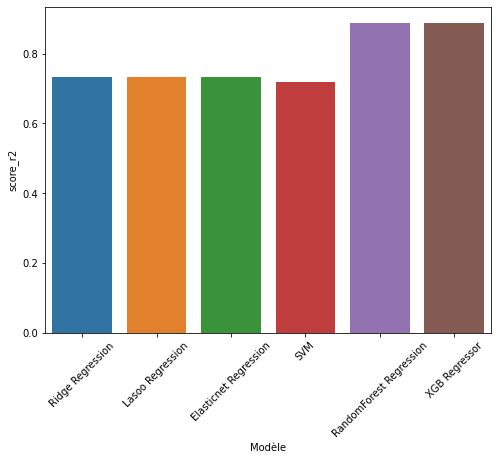

In [ ]:
plt.figure(figsize=(8,6))
g=sns.barplot(results_model1['Modèle'],results_model1['score_r2'])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

# **CO2 Emission model**

## **Linear models**

### Linear Regression

In [ ]:
X3=model_data3.drop('TotalGHGEmissions',axis=1).values
y3=model_data3[['TotalGHGEmissions']].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=101)

In [ ]:
reg=LinearRegression(,)
reg.fit(X_train,y_train)
pred_reg=reg.predict(X_test)

In [ ]:
mean_squared_error(pred_reg,y_test)

1.6337373911158546

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,pred_reg)

0.5631807314907349

In [ ]:
reg.score(X_test,y_test)

0.5631807314907349

In [ ]:
results_emissions=pd.DataFrame()
results_emissions = results_emissions.append(pd.DataFrame({
    'Modèle' : ['Linear Regression'],
    'Score_RMSE' : [mean_squared_error(pred_reg, y_test)],
    'score_r2':r2_score(y_test,pred_reg)}),
              ignore_index=True)

In [ ]:
results_emissions

,Modèle,Score_RMSE,score_r2
0,Linear Regression,1.633737,0.563181


### Ridge Regression

In [ ]:
n_alphas=100
alphas = np.logspace(-5, 5, n_alphas)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
reg_ridge=Ridge()
param_ridge={'alpha':alphas,'solver':['auto', 'svd','lsqr', 'sparse_cg']}
grid_ridge=GridSearchCV(reg_ridge,
                        param_grid = param_ridge,cv = 5,
                        verbose=3,n_jobs=-1)

In [ ]:
grid_ridge.fit(X_train3,y_train3)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   15.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-...
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05]),
                         'solver': ['auto', 'svd', 'lsqr', 'sparse_cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_ridge3=grid_ridge.best_estimator_

In [ ]:
best_ridge3.fit(X_train3, y_train3) 
y_best_ridge = best_ridge3.predict(X_test3) 

In [ ]:
results_emissions=pd.DataFrame()
results_emissions = results_emissions.append(pd.DataFrame({
    'Modèle' : ['Ridge Regression'],
    'Score_RMSE' : [mean_squared_error(y_best_ridge, y_test3)],
    'score_r2':r2_score(y_test3,y_best_ridge)}),
              ignore_index=True)

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()

In [ ]:
lasso_=300
lasso_alphas = np.logspace(-5, 1, lasso_)
param_lasso={'alpha':lasso_alphas,'copy_X':[True,False],'fit_intercept':[True,False]}
grid_lasso=GridSearchCV(lasso,
                        param_grid = param_lasso,cv = 5,
                        verbose=3,n_jobs=-1)

In [ ]:
grid_lasso.fit(X_train3,y_train3)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4358 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  8.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.04728984e-05, 1.09681601e-05, 1.14868426e-05,
       1.20300535e-05, 1....
       5.00030684e+00, 5.23677054e+00, 5.48441658e+00, 5.74377375e+00,
       6.01539588e+00, 6.29986298e+00, 6.59778248e+00, 6.90979055e+00,
       7.23655342e+00, 7.57876886e+00, 7.93716762e+00, 8.31251499e+00,
       8.70561248e+00, 9.11729948e+00, 9.54845510e+00, 1.00000000e+01]),
                         'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [ ]:
best_lasso3=Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
best_lasso3.fit(X_train3,y_train3)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
results_emissions = results_emissions.append(pd.DataFrame({
    'Modèle' : ['Lasso Regression'],
    'Score_RMSE' : [mean_squared_error(best_lasso.predict(X_test3), y_test3)],
     'score_r2':r2_score(y_test3,best_lasso.predict(X_test3))}),
              ignore_index=True)

### Elastic Net

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_rand = RandomizedSearchCV(ElasticNet(),net_parameters,n_iter=200,scoring = 'neg_mean_squared_error',cv=5,verbose=3,n_jobs=-1)

elastic_rand.fit(X_train3, y_train3)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   43.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000],
                                        'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'tol': [0.1, 0.01, 0.001, 0.0001]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg

In [ ]:
best_net3=ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.001, warm_start=False)
best_net3.fit(X_train3,y_train3)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.001, warm_start=False)

In [ ]:
y_best_net=best_net3.predict(X_test3)

In [ ]:
results_emissions = results_emissions.append(pd.DataFrame({
    'Modèle' : ['Elastic Regression'],
    'Score_RMSE' : [mean_squared_error(y_best_net, y_test3)],
     'score_r2':r2_score(y_test3,y_best_net)}),
              ignore_index=True)

## **Non-Linear models**

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
rand_forest=RandomizedSearchCV(rf,random_params,n_iter=100,cv=5,n_jobs=-1,verbose=2)

In [ ]:
rand_forest.fit(X_train3,y_train3)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 43.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 60.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
best_rand3=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
best_rand3.fit(X_train3,y_train3)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_best_rand=best_rand.predict(X_test3)

In [ ]:
results_emissions = results_emissions.append(pd.DataFrame({
    'Modèle' : ['RandomForest Regression'],
    'Score_RMSE' : [mean_squared_error(y_best_rand, y_test3)],
    'score_r2':r2_score(y_test3,y_best_rand)}),
              ignore_index=True)

### **XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
parameters_xgb = {
    'n_estimators' : [100,300,600,1000],
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,4)],
    'subsample':[i/10.0 for i in range(6,9)],
    'colsample_bytree':[i/10.0 for i in range(6,9)],
    'reg_alpha':[1e-2, 0.1, 1, 100]

}

rand_xgb=RandomizedSearchCV(XGBRegressor(),parameters_xgb,n_iter=150,cv=5,n_jobs=-1,verbose=2)
'''xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,cv = 2,
                        verbose=2,n_jobs=-1)'''
rand_xgb.fit(X_train3,y_train3)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 35.1min finished


[11:56:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=150, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8],
                                        'gamma': [0

In [ ]:
best_xgb3=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=5, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

In [ ]:
best_xgb3.fit(X_train3,y_train3)

[14:40:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=5, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

In [ ]:
y_best_xgb=best_xgb.predict(X_test3)

In [ ]:
results_emissions = results_emissions .append(pd.DataFrame({
    'Modèle' : ['XGB Regressor'],
    'Score_RMSE' : [mean_squared_error(y_best_xgb, y_test3)],
    'score_r2':r2_score(y_test3,y_best_xgb)}),
              ignore_index=True)

### SVR

In [ ]:
best_svr3=SVR(gamma=0.001,epsilon=0.01,C=10)
best_svr3.fit(X_train3,y_train3)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
results_emissions = results_emissions .append(pd.DataFrame({
    'Modèle' : ['SVM'],
    'Score_RMSE' : [mean_squared_error(best_svr.predict(X_test3), y_test3)],
    'score_r2':r2_score(y_test3,best_svr.predict(X_test3))}),
              ignore_index=True)

In [ ]:
results_emissions

,Modèle,Score_RMSE,score_r2
0,Ridge Regression,1.633248,0.563311
1,Lasso Regression,1.632322,0.563559
2,Elastic Regression,1.628957,0.564459
3,RandomForest Regression,0.683239,0.817319
4,XGB Regressor,0.692364,0.814880
5,SVM,1.533126,0.590082


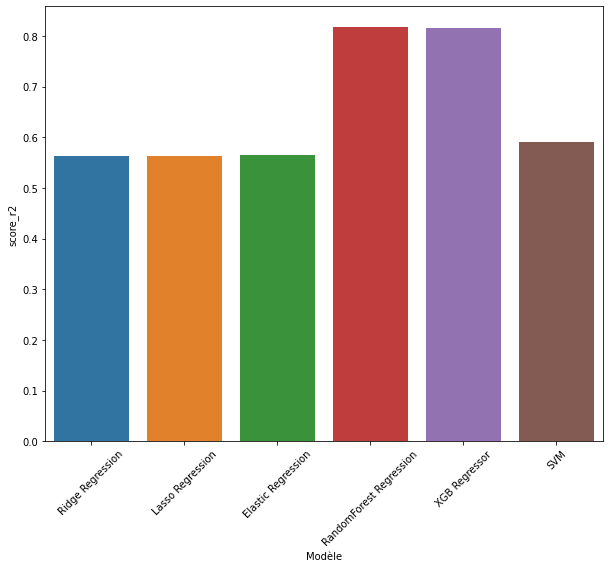

In [ ]:
plt.figure(figsize=(10,8))
g=sns.barplot(results_emissions['Modèle'],results_emissions['score_r2'])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

# **Consumption with ENERGYSTARScore**

## **Linear models**

### Linear Regression

In [ ]:
X2=model_data2.drop('SiteEnergyUse',axis=1).values
y2=model_data2[['SiteEnergyUse']].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=101)

In [ ]:
reg=LinearRegression()
reg.fit(X_train2,y_train2)
pred_reg=reg.predict(X_test2)

In [ ]:
mean_squared_error(pred_reg,y_test2)

0.3748854408686862

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test2,pred_reg)

0.8163852894259538

In [ ]:
reg.score(X_test2,y_test2)

0.8163852894259537

In [ ]:
results_model2=pd.DataFrame()
results_model2 = results_model2.append(pd.DataFrame({
    'Modèle' : ['Linear Regression'],
    'Score_RMSE' : [mean_squared_error(pred_reg, y_test2)],
    'score_r2':r2_score(y_test2,pred_reg)}),
              ignore_index=True)

In [ ]:
results_emissions

,Modèle,Score_RMSE,score_r2
0,Linear Regression,1.633737,0.563181


### Ridge Regression

In [ ]:
n_alphas=100
alphas = np.logspace(-5, 5, n_alphas)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
reg_ridge=Ridge()
param_ridge={'alpha':alphas,'solver':['auto', 'svd','lsqr', 'sparse_cg']}
grid_ridge2=GridSearchCV(reg_ridge,
                        param_grid = param_ridge,cv = 5,
                        verbose=3,n_jobs=-1)

In [ ]:
grid_ridge2.fit(X_train2,y_train2)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   11.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-...
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05]),
                         'solver': ['auto', 'svd', 'lsqr', 'sparse_cg']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
best_ridge2=grid_ridge2.best_estimator_

In [ ]:
best_ridge2.fit(X_train2, y_train2) 
y_best_ridge2 = best_ridge2.predict(X_test2) 

In [ ]:
model_consumption=pd.DataFrame()
model_consumption= model_consumption.append(pd.DataFrame({
    'Modèle' : ['Ridge Regression'],
    'score_r2_no_Escore' : r2_score(y_test,y_best_ridge),
    'score_r2_with_Escore':r2_score(y_test2,y_best_ridge2)}),
              ignore_index=True)

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()

In [ ]:
lasso_=300
lasso_alphas = np.logspace(-5, 1, lasso_)
param_lasso={'alpha':lasso_alphas,'copy_X':[True,False],'fit_intercept':[True,False]}
grid_lasso2=GridSearchCV(lasso,
                        param_grid = param_lasso,cv = 5,
                        verbose=3,n_jobs=-1)

In [ ]:
grid_lasso2.fit(X_train2,y_train2)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2988 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4204 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 5768 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  5.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 1.04728984e-05, 1.09681601e-05, 1.14868426e-05,
       1.20300535e-05, 1....
       5.00030684e+00, 5.23677054e+00, 5.48441658e+00, 5.74377375e+00,
       6.01539588e+00, 6.29986298e+00, 6.59778248e+00, 6.90979055e+00,
       7.23655342e+00, 7.57876886e+00, 7.93716762e+00, 8.31251499e+00,
       8.70561248e+00, 9.11729948e+00, 9.54845510e+00, 1.00000000e+01]),
                         'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [ ]:
best_lasso2=Lasso(alpha=0.00014584098829439863, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
best_lasso2.fit(X_train2,y_train2)

Lasso(alpha=0.00014584098829439863, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
model_consumption= model_consumption.append(pd.DataFrame({
    'Modèle' : ['Lasso Regression'],
    'score_r2_no_Escore' : r2_score(y_test,best_lasso.predict(X_test)),
    'score_r2_with_Escore':r2_score(y_test2,best_lasso2.predict(X_test2))}),
              ignore_index=True)

In [ ]:
elastic_rand = RandomizedSearchCV(ElasticNet(),net_parameters,n_iter=200,scoring = 'neg_mean_squared_error',cv=5,verbose=3,n_jobs=-1)

elastic_rand.fit(X_train2, y_train2)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 476 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   41.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000],
                                        'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'tol': [0.1, 0.01, 0.001, 0.0001]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg

In [ ]:
elastic_rand = RandomizedSearchCV(ElasticNet(),net_parameters,n_iter=200,scoring = 'neg_mean_squared_error',cv=5,verbose=3,n_jobs=-1)

elastic_rand.fit(X_train2, y_train2)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   32.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=200, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100, 1000],
                                        'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'tol': [0.1, 0.01, 0.001, 0.0001]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg

In [ ]:
best_net2=ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.01, warm_start=False)
best_net2.fit(X_train2,y_train2)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.01, warm_start=False)

In [ ]:
y_best_net2=best_net2.predict(X_test2)

In [ ]:
model_consumption= model_consumption.append(pd.DataFrame({
    'Modèle' : ['Net Regression'],
    'score_r2_no_Escore' : r2_score(y_test,y_best_net),
    'score_r2_with_Escore':r2_score(y_test2,y_best_net2)}),
              ignore_index=True)

## **Non-Linear models**

### Random Forest

In [ ]:
random_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rand_forest=RandomizedSearchCV(rf,random_params,n_iter=100,cv=5,n_jobs=-1,verbose=2)

In [ ]:
rand_forest.fit(X_train2,y_train2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 42.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
best_rand2=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
best_rand2.fit(X_train2,y_train2)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_best_rand2=best_rand2.predict(X_test2)

In [ ]:
model_consumption= model_consumption.append(pd.DataFrame({
    'Modèle' : ['RandomForest'],
    'score_r2_no_Escore' : r2_score(y_test,y_best_rand),
    'score_r2_with_Escore':r2_score(y_test2,y_best_rand2)}),
              ignore_index=True)

### **XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
parameters_xgb = {
    'n_estimators' : [100,300,600,1000],
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,4)],
    'subsample':[i/10.0 for i in range(6,9)],
    'colsample_bytree':[i/10.0 for i in range(6,9)],
    'reg_alpha':[1e-2, 0.1, 1, 100]

}

rand_xgb=RandomizedSearchCV(XGBRegressor(),parameters_xgb,n_iter=150,cv=5,n_jobs=-1,verbose=2)
'''xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1),
                        param_grid = parameters,cv = 2,
                        verbose=2,n_jobs=-1)'''
rand_xgb.fit(X_train2,y_train2)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 26.9min finished


[18:41:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=150, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8],
                                        'gamma': [0

In [ ]:
best_xgb2=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=5, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

In [ ]:
best_xgb2.fit(X_train2,y_train2)

[16:00:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=5, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

In [ ]:
y_best_xgb2=best_xgb2.predict(X_test2)

In [ ]:
model_consumption= model_consumption.append(pd.DataFrame({
    'Modèle' : ['XGBoost'],
    'score_r2_no_Escore' : r2_score(y_test,y_best_xgb),
    'score_r2_with_Escore':r2_score(y_test2,y_best_xgb2)}),
              ignore_index=True)

In [ ]:
model_consumption

,Modèle,score_r2_no_Escore,score_r2_with_Escore
0,Ridge Regression,0.732127,0.816339
1,Lasso Regression,0.732706,0.815906
2,Net Regression,0.733762,0.815901
3,RandomForest,0.888275,0.915203
4,XGBoost,0.886333,0.924000


# **Model Evaluation**

## **Evaluation of time**

In [ ]:
consumption_models={'Ridge':best_ridge1,'Lasso':best_lasso1,'Elastic':best_net1,'SVR':best_svr1,'RandomForest':best_rand1,'XGBoost':best_xgb1}

In [ ]:
for model in consumption_models:
  print('prediction time for model {}:'.format(model))
  %timeit consumption_models[model].predict(X_train)

prediction time for model Ridge:
The slowest run took 26.03 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 331 µs per loop
prediction time for model Lasso:
1000 loops, best of 5: 334 µs per loop
prediction time for model Elastic:
1000 loops, best of 5: 341 µs per loop
prediction time for model SVR:
1 loop, best of 5: 1.37 s per loop
prediction time for model RandomForest:
1 loop, best of 5: 895 ms per loop
prediction time for model XGBoost:
1 loop, best of 5: 263 ms per loop


In [ ]:
emissions_models={'Ridge':best_ridge3,'Lasso':best_lasso3,'Elastic':best_net3,'SVR':best_svr3,'RandomForest':best_rand3,'XGBoost':best_xgb3}

In [ ]:
for model in emissions_models:
  print('prediction time for model {}:'.format(model))
  %timeit emissions_models[model].predict(X_train3)

prediction time for model Ridge:
The slowest run took 35.83 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 317 µs per loop
prediction time for model Lasso:
1000 loops, best of 5: 346 µs per loop
prediction time for model Elastic:
1000 loops, best of 5: 337 µs per loop
prediction time for model SVR:
1 loop, best of 5: 1.37 s per loop
prediction time for model RandomForest:
1 loop, best of 5: 901 ms per loop
prediction time for model XGBoost:
1 loop, best of 5: 610 ms per loop


## **Evaluation of the Features** 

In [46]:
 Coeff_rand=pd.DataFrame({'Variable':model_data1.drop('SiteEnergyUse',axis=1).columns.tolist(),'Coeff':best_rand.feature_importances_}).sort_values('Coeff',ascending=False)
Coeff_rand.head(10)

,Variable,Coeff
9,PropertyGFATotal,0.195202
7,PropertyGFABuilding(s),0.173057
1,LargestPropertyUseTypeGFA,0.159219
0,SecondLargestPropertyUseTypeGFA,0.051888
2,NumberofFloors,0.046569
6,YearBuilt,0.043194
51,BuildingType_Multifamily LR (1-4),0.035987
4,Latitude,0.035600
5,Longitude,0.035570
8,PropertyGFAParking,0.023649


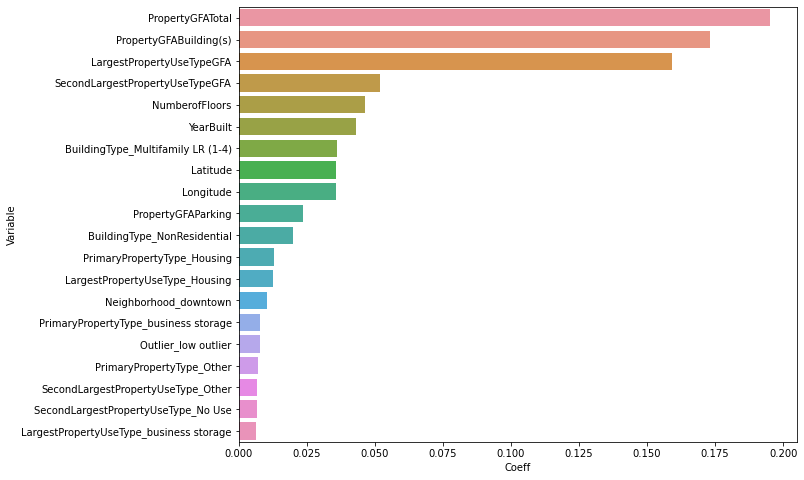

In [48]:
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.barplot(x=Coeff_rand.head(20)['Coeff'],
            y=Coeff_rand.head(20)['Variable'])
plt.show()

In [34]:
forest_features=Coeff_rand.head(10)['Variable'].values

In [35]:
X_tree_reduced=model_data1[forest_features].values
y_tree_reduced=model_data1[['SiteEnergyUse']].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_tree_reduced, y_tree_reduced, test_size=0.33, random_state=101)

In [36]:
rand_tree_reduced=RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rand_tree_reduced.fit(X_train4,y_train4)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
y_rand_reduced=rand_tree_reduced.predict(X_test4)

In [38]:
Coeff_xgb=pd.DataFrame({'Variable':model_data1.drop('SiteEnergyUse',axis=1).columns.tolist(),'Coeff':best_xgb.feature_importances_}).sort_values('Coeff',ascending=False)
Coeff_xgb.head(10)

,Variable,Coeff
54,BuildingType_Nonresidential COS,0.094003
42,Outlier_low outlier,0.078192
19,LargestPropertyUseType_Leisure,0.072227
9,PropertyGFATotal,0.063197
51,BuildingType_Multifamily LR (1-4),0.049470
49,PrimaryPropertyType_business storage,0.044163
44,PrimaryPropertyType_Housing,0.033850
1,LargestPropertyUseTypeGFA,0.032867
43,Outlier_normal,0.025857
52,BuildingType_Multifamily MR (5-9),0.025197


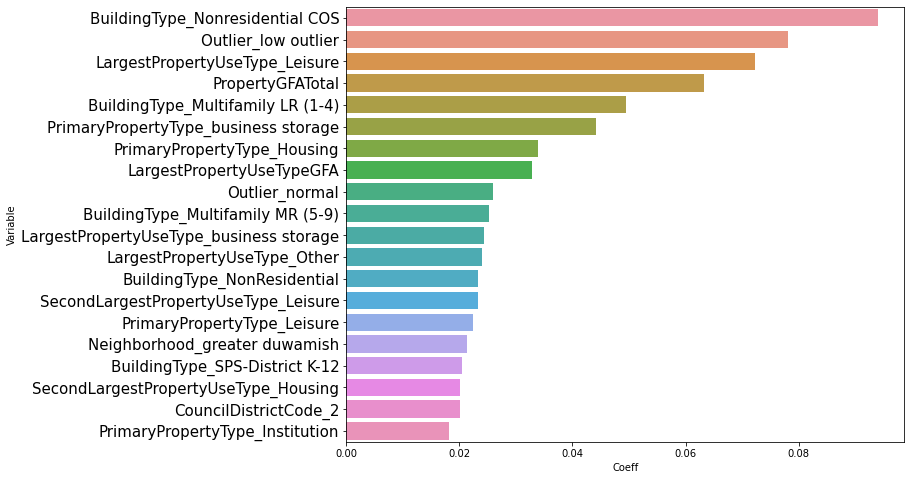

In [54]:
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.barplot(x=Coeff_xgb.head(20)['Coeff'],
            y=Coeff_xgb.head(20)['Variable'])
plt.yticks(fontsize=15)
plt.show()

In [40]:
xgb_features=Coeff_xgb.head(10)['Variable'].values

In [41]:
X_xgb_reduced=model_data1[xgb_features].values
y_xgb_reduced=model_data1[['SiteEnergyUse']].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_xgb_reduced, y_xgb_reduced, test_size=0.33, random_state=101)

In [42]:
xgb_reduced=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=5, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

xgb_reduced.fit(X_train5,y_train5)

[09:36:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=5, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [43]:
y_xgb_reduced=xgb_reduced.predict(X_test5)

In [44]:
from sklearn.metrics import mean_squared_error,r2_score
results=pd.DataFrame()
results = results.append(pd.DataFrame({
    'Modèle' : ['Random_Forest','Random_Forest_Reduced','XGBoost','XGBoost_reduced'],
    'Score_RMSE' : [mean_squared_error(y_test,best_rand.predict(X_test)),mean_squared_error(y_test4,y_rand_reduced),
                    mean_squared_error(y_test,y_best_rand),mean_squared_error(y_test5,y_xgb_reduced)],
    'score_r2':[r2_score(y_test,best_rand.predict(X_test)),r2_score(y_test4,y_rand_reduced),r2_score(y_test,y_best_rand),r2_score(y_test5,y_xgb_reduced)]}),
              ignore_index=True)

In [45]:
results

,Modèle,Score_RMSE,score_r2
0,Random_Forest,0.246927,0.887186
1,Random_Forest_Reduced,0.301579,0.862217
2,XGBoost,0.246927,0.887186
3,XGBoost_reduced,0.377989,0.827307


In [32]:
reduced_models={'Random_Forest':best_rand,'Forest_Reduced':rand_tree_reduced,'XGB':best_xgb,'XGB_Reduced':xgb_reduced}
data_reduced=[X_train,X_train4,X_train,X_train5]

In [47]:
for model,data in zip(reduced_models,data_reduced):
  print('prediction time for model {}:'.format(model))
  %timeit reduced_models[model].predict(data)

prediction time for model Random_Forest:
1 loop, best of 5: 851 ms per loop
prediction time for model Forest_Reduced:
1 loop, best of 5: 828 ms per loop
prediction time for model XGB:
1 loop, best of 5: 255 ms per loop
prediction time for model XGB_Reduced:
1 loop, best of 5: 210 ms per loop
